In [1]:
# Title:  kNN: k-Nearest Neighbors

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  caret,         # Train/test functions
  e1071,         # Machine learning functions
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

# Set random seed to reproduce the results
set.seed(1)

also installing the dependency ‘proxy’





  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-5  1.7-6              TRUE


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpodUn7G/downloaded_packages


installing the source package ‘e1071’



e1071 installed



In [3]:
# LOAD AND PREPARE DATA ####################################

# Use the `spambase` datasets that were created previously 
# in "Spambase.R."

# Import training data `trn`
trn <- import("data/spambase_trn.rds")

# Import testing data `tst`
tst <- import("data/spambase_tst.rds")

In [4]:
# COMPUTE KNN MODEL ON TRAINING DATA #######################

# Define parameters for kNN
statctrl <- trainControl(
  method  = "repeatedcv",  # Repeated cross-validation
  number  = 5,             # Number of folds
  repeats = 3              # Number of sets of folds
)  

In [6]:
# Set up parameters to try while training (3-19)
k = rep(seq(3, 20, by = 2), 2)
k

[1]  3  5  7  9 11 13 15 17 19  3  5  7  9 11 13 15 17 19

In [7]:
# Apply model to training data (takes a moment)
fit <- train(
  y ~ ., 
  data = trn,                         # Use training data
  method = "knn",                     # kNN training method
  trControl = statctrl,               # Control parameters
  tuneGrid = data.frame(k),           # Search grid param.
  preProcess = c("center", "scale"),  # Preprocess
  na.action = "na.omit"
)

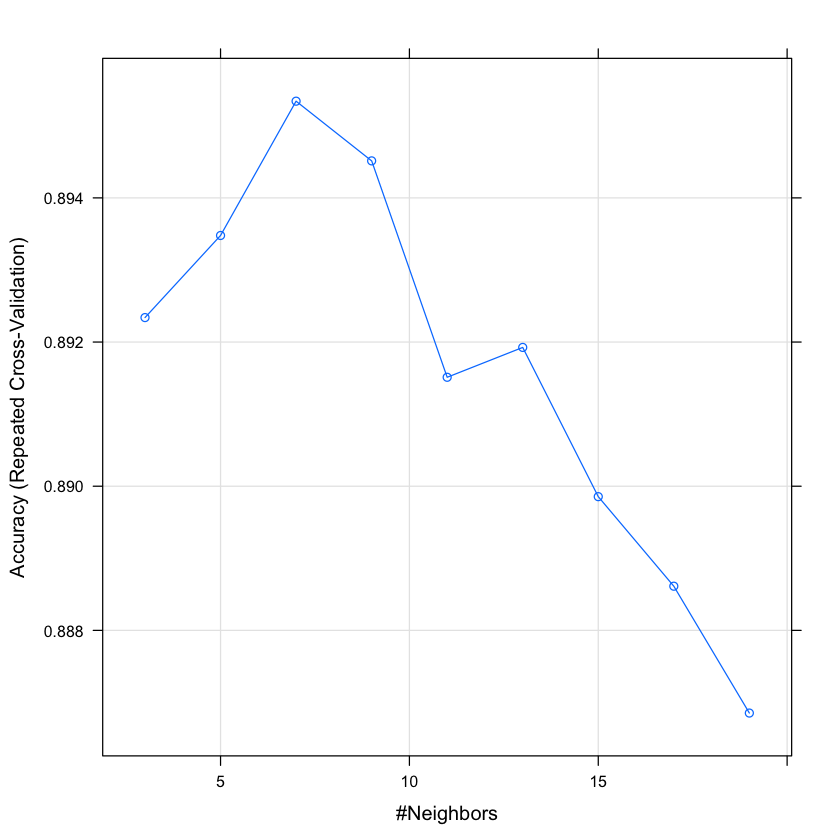

In [9]:
# Plot accuracy against various k values
fit %>% plot()                # Automatic range on Y axis

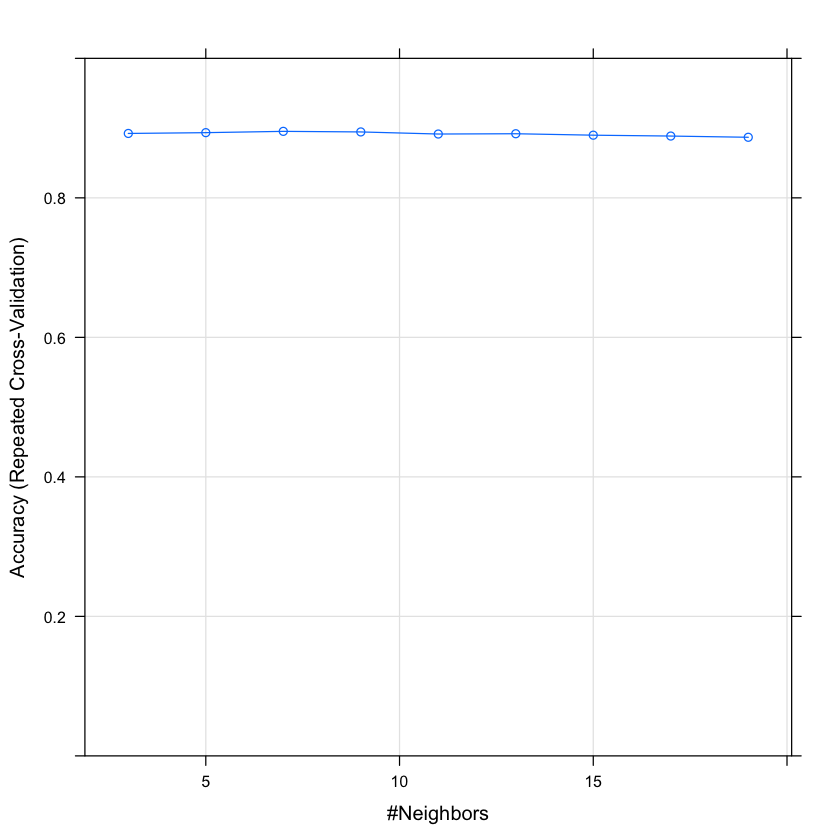

In [10]:
fit %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [11]:
# Print the final model
fit %>% print()

k-Nearest Neighbors 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

Pre-processing: centered (57), scaled (57) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8923395  0.7748909
   5  0.8934783  0.7763252
   7  0.8953416  0.7798753
   9  0.8945135  0.7779009
  11  0.8915114  0.7709117
  13  0.8919255  0.7716959
  15  0.8898551  0.7669987
  17  0.8886128  0.7642910
  19  0.8868530  0.7605001

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


In [18]:
 # APPLY MODEL TO TEST DATA #################################

# Predict test set
pred <- predict(    # Create new variable ("predicted")
  fit,              # Apply saved model
  newdata = tst     # Use test data
)

In [19]:
# Get the confusion matrix
cm <- pred %>%
  confusionMatrix(reference = tst$y)

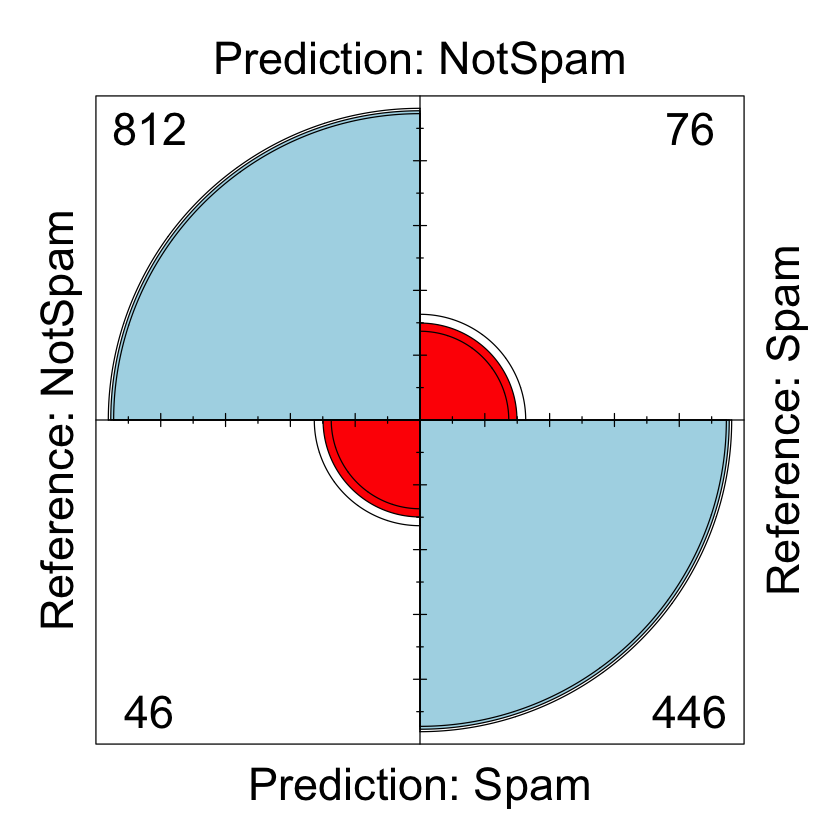

In [21]:
# Plot the confusion matrix
cm$table %>% 
  fourfoldplot(color = c("red", "lightblue"))

In [22]:
# Print the confusion matrix
cm %>% print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     812   76
   Spam         46  446
                                         
               Accuracy : 0.9116         
                 95% CI : (0.8954, 0.926)
    No Information Rate : 0.6217         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8099         
                                         
 Mcnemar's Test P-Value : 0.008651       
                                         
            Sensitivity : 0.9464         
            Specificity : 0.8544         
         Pos Pred Value : 0.9144         
         Neg Pred Value : 0.9065         
             Prevalence : 0.6217         
         Detection Rate : 0.5884         
   Detection Prevalence : 0.6435         
      Balanced Accuracy : 0.9004         
                                         
       'Positive' Class : NotSpam        
                                   